**Machine Learning**

- Classify mobile phone price, based on it's features

**Conclusion**

- Support Vector Classification tuned is very good model in machine learning to classify mobile phone price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('mobile_price.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop(columns='price_range')
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .90,random_state = 42)

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [6]:
cat_columns = []

num_columns = ["battery_power",
    "blue",
    "clock_speed",
    "dual_sim",
    "four_g",
    "fc",
    "int_memory",
    "m_dep",
    "mobile_wt",
    "n_cores",
    "pc",
    "px_height",
    "px_width",
    "ram",
    "sc_h",
    "sc_w",
    "talk_time",
    "three_g",
    "touch_screen",
    "wifi"]

In [7]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, num_columns),
    ('categorical', categorical_pipeline, cat_columns)
])

In [8]:
pipe_Log = Pipeline([
    ("prep", preprocessor),
    ("algo", LogisticRegression())
])

pipe_KNN = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsClassifier())
])

pipe_RF = Pipeline([
    ("prep", preprocessor),
    ("algo", RandomForestClassifier())
])

pipe_SVC = Pipeline([
    ("prep", preprocessor),
    ("algo", SVC())
])

pipe_Log.fit(X_train, y_train)
pipe_KNN.fit(X_train, y_train)
pipe_RF.fit(X_train, y_train)
pipe_SVC.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['battery_power', 'blue',
                                                   'clock_speed', 'dual_sim',
                                                   'four_g', 'fc', 'int_memory',
                                                   'm_dep', 'mobile_wt',
                                                   'n_cores', 'pc', 'px_height',
                                                   'px_width', 'ram', 'sc_h',
                                                   'sc_w', 'talk_time',
                                                 

In [9]:
y_pred_Logtr = pipe_Log.predict(X_train)
acc_Logtr = accuracy_score(y_train, y_pred_Logtr)
prec_Logtr = precision_score(y_train, y_pred_Logtr, average="weighted")
rec0_Logtr = recall_score (y_train, y_pred_Logtr, pos_label=0, average="weighted")
rec1_Logtr = recall_score(y_train, y_pred_Logtr, pos_label=1, average="weighted")
rec2_Logtr = recall_score(y_train, y_pred_Logtr, pos_label=2, average="weighted")
rec3_Logtr = recall_score(y_train, y_pred_Logtr, pos_label=3, average="weighted")
f1_Logtr = f1_score(y_train, y_pred_Logtr, average="weighted")

y_pred_KNNtr = pipe_KNN.predict(X_train)
acc_KNNtr = accuracy_score(y_train, y_pred_KNNtr)
prec_KNNtr = precision_score(y_train, y_pred_KNNtr, average="weighted")
rec0_KNNtr = recall_score (y_train, y_pred_KNNtr, pos_label=0, average="weighted")
rec1_KNNtr = recall_score(y_train, y_pred_KNNtr, pos_label=1, average="weighted")
rec2_KNNtr = recall_score(y_train, y_pred_KNNtr, pos_label=2, average="weighted")
rec3_KNNtr = recall_score(y_train, y_pred_KNNtr, pos_label=3, average="weighted")
f1_KNNtr = f1_score(y_train, y_pred_KNNtr, average="weighted")

y_pred_RFtr = pipe_RF.predict(X_train)
acc_RFtr = accuracy_score(y_train, y_pred_RFtr)
prec_RFtr = precision_score(y_train, y_pred_RFtr, average="weighted")
rec0_RFtr = recall_score (y_train, y_pred_RFtr, pos_label=0, average="weighted")
rec1_RFtr = recall_score(y_train, y_pred_RFtr, pos_label=1, average="weighted")
rec2_RFtr = recall_score(y_train, y_pred_RFtr, pos_label=2, average="weighted")
rec3_RFtr = recall_score(y_train, y_pred_RFtr, pos_label=3, average="weighted")
f1_RFtr = f1_score(y_train, y_pred_RFtr, average="weighted")

y_pred_SVCtr = pipe_SVC.predict(X_train)
acc_SVCtr = accuracy_score(y_train, y_pred_SVCtr)
prec_SVCtr = precision_score(y_train, y_pred_SVCtr, average="weighted")
rec0_SVCtr = recall_score (y_train, y_pred_SVCtr, pos_label=0, average="weighted")
rec1_SVCtr = recall_score(y_train, y_pred_SVCtr, pos_label=1, average="weighted")
rec2_SVCtr = recall_score(y_train, y_pred_SVCtr, pos_label=2, average="weighted")
rec3_SVCtr = recall_score(y_train, y_pred_SVCtr, pos_label=3, average="weighted")
f1_SVCtr = f1_score(y_train, y_pred_SVCtr, average="weighted")


y_pred_Logts = pipe_Log.predict(X_test)
acc_Logts = accuracy_score(y_test, y_pred_Logts)
prec_Logts = precision_score(y_test, y_pred_Logts, average="weighted")
rec0_Logts = recall_score (y_test, y_pred_Logts, pos_label=0, average="weighted")
rec1_Logts = recall_score(y_test, y_pred_Logts, pos_label=1, average="weighted")
rec2_Logts = recall_score(y_test, y_pred_Logts, pos_label=2, average="weighted")
rec3_Logts = recall_score(y_test, y_pred_Logts, pos_label=3, average="weighted")
f1_Logts = f1_score(y_test, y_pred_Logts, average="weighted")

y_pred_KNNts = pipe_KNN.predict(X_test)
acc_KNNts = accuracy_score(y_test, y_pred_KNNts)
prec_KNNts = precision_score(y_test, y_pred_KNNts, average="weighted")
rec0_KNNts = recall_score (y_test, y_pred_KNNts, pos_label=0, average="weighted")
rec1_KNNts = recall_score(y_test, y_pred_KNNts, pos_label=1, average="weighted")
rec2_KNNts = recall_score(y_test, y_pred_KNNts, pos_label=2, average="weighted")
rec3_KNNts = recall_score(y_test, y_pred_KNNts, pos_label=3, average="weighted")
f1_KNNts = f1_score(y_test, y_pred_KNNts, average="weighted")

y_pred_RFts = pipe_RF.predict(X_test)
acc_RFts = accuracy_score(y_test, y_pred_RFts)
prec_RFts = precision_score(y_test, y_pred_RFts, average="weighted")
rec0_RFts = recall_score (y_test, y_pred_RFts, pos_label=0, average="weighted")
rec1_RFts = recall_score(y_test, y_pred_RFts, pos_label=1, average="weighted")
rec2_RFts = recall_score(y_test, y_pred_RFts, pos_label=2, average="weighted")
rec3_RFts = recall_score(y_test, y_pred_RFts, pos_label=3, average="weighted")
f1_RFts = f1_score(y_test, y_pred_RFts, average="weighted")

y_pred_SVCts = pipe_SVC.predict(X_test)
acc_SVCts = accuracy_score(y_test, y_pred_SVCts)
prec_SVCts = precision_score(y_test, y_pred_SVCts, average="weighted")
rec0_SVCts = recall_score (y_test, y_pred_SVCts, pos_label=0, average="weighted")
rec1_SVCts = recall_score(y_test, y_pred_SVCts, pos_label=1, average="weighted")
rec2_SVCts = recall_score(y_test, y_pred_SVCts, pos_label=2, average="weighted")
rec3_SVCts = recall_score(y_test, y_pred_SVCts, pos_label=3, average="weighted")
f1_SVCts = f1_score(y_test, y_pred_SVCts, average="weighted")

In [10]:
data = {
    "LogReg Train" : [acc_Logtr, prec_Logtr, rec1_Logtr, f1_Logtr],
    "LogReg Test" : [acc_Logts, prec_Logts, rec1_Logts, f1_Logts],
    "KNN Train" : [acc_KNNtr, prec_KNNtr, rec1_KNNtr, f1_KNNtr],
    "KNN Test" : [acc_KNNts, prec_KNNts, rec1_KNNts, f1_KNNts],
    "RF Train" : [acc_RFtr, prec_RFtr, rec1_RFtr, f1_RFtr],
    "RF Test" : [acc_RFts, prec_RFts, rec1_RFts, f1_RFts],
    "SVC Train" : [acc_SVCtr, prec_SVCtr, rec1_SVCtr, f1_SVCtr],
    "SVC Test" : [acc_SVCts, prec_SVCts, rec1_SVCts, f1_SVCts]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg Train,LogReg Test,KNN Train,KNN Test,RF Train,RF Test,SVC Train,SVC Test
Accuracy,0.968333,0.98,0.727778,0.480000,1.0,0.865000,0.980000,0.910000
Precision,0.968272,0.98,0.734906,0.515863,1.0,0.870393,0.980129,0.911164
Recall,0.968333,0.98,0.727778,0.480000,1.0,0.865000,0.980000,0.910000
F1 Score,0.968254,0.98,0.728105,0.491953,1.0,0.866180,0.980035,0.910184


**Hyperparameter Tuning**

Parameter

In [11]:
Param_Log = {
    "algo__penalty" : ["l1","l2","elasticnet","none"],
    "algo__class_weight" : [dict, "balanced"],
    "algo__max_iter" : [10,100,500],
    "algo__intercept_scaling" : [1,5,10]
}

Param_KNN = {
    "algo__n_neighbors" : [1,3,5],
    "algo__weights" : ["distance","uniform"],
    "algo__leaf_size" : [1,5,15]
}

Param_RF = {
    "algo__n_estimators" : [50,300],
     #"max_depth" : [8],
     "algo__min_samples_split" : [2,5],
     "algo__min_samples_leaf" : [1,2]
}

Param_SVC = {
    "algo__max_iter" : [2000],
    "algo__kernel" : ['poly', 'rbf', 'sigmoid'],
    "algo__cache_size" : [2000],
}

In [12]:
# pipe_Log.get_params()
# pipe_KNN.get_params()
# pipe_RF.get_params()
# pipe_SVC.get_params()

In [13]:
from sklearn.model_selection import GridSearchCV

**Logistic Regression Tuning**

In [14]:
model_tuned_1 = GridSearchCV(estimator=pipe_Log, param_grid=Param_Log, cv = 3, n_jobs=-1, verbose=1)

model_tuned_1.fit(X_train, y_train)
model_tuned_1.best_score_
model_tuned_1_1 = model_tuned_1.best_estimator_
y_tune_1_train = model_tuned_1_1.predict(X_train)
y_tune_1_test = model_tuned_1_1.predict(X_test)

print('Best Score :',model_tuned_1.best_score_)
print('Tuned recall LogReg Tuned Train : ', recall_score(y_train, y_tune_1_train, average="weighted"))
print('Tuned recall LogReg Tuned Test : ', recall_score(y_test, y_tune_1_test, average="weighted"))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    3.2s finished


Best Score : 0.9655555555555556
Tuned recall LogReg Tuned Train :  0.99
Tuned recall LogReg Tuned Test :  0.975


**KNN Tuning**

In [15]:
model_tuned_2 = GridSearchCV(estimator=pipe_KNN, param_grid=Param_KNN, cv = 3, n_jobs=-1, verbose=1)

model_tuned_2.fit(X_train, y_train)
model_tuned_2.best_score_
model_tuned_2_1 = model_tuned_2.best_estimator_
y_tune_2_train = model_tuned_2_1.predict(X_train)
y_tune_2_test = model_tuned_2_1.predict(X_test)

print('Best Score :',model_tuned_2.best_score_)
print('Tuned recall KNN Tuned Train : ', recall_score(y_train, y_tune_2_train, average="weighted"))
print('Tuned recall KNN Tuned Test : ', recall_score(y_test, y_tune_2_test, average="weighted"))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    1.7s finished


Best Score : 0.5261111111111111
Tuned recall KNN Tuned Train :  1.0
Tuned recall KNN Tuned Test :  0.505


**Random Forest Tuning**

In [16]:
model_tuned_3 = GridSearchCV(estimator=pipe_RF, param_grid=Param_RF, cv = 3, n_jobs=-1, verbose=1)

model_tuned_3.fit(X_train, y_train)
model_tuned_3.best_score_
model_tuned_3_1 = model_tuned_3.best_estimator_
y_tune_3_train = model_tuned_3_1.predict(X_train)
y_tune_3_test = model_tuned_3_1.predict(X_test)

print('Best Score :',model_tuned_3.best_score_)
print('Tuned recall RF Tuned Train : ', recall_score(y_train, y_tune_3_train, average="weighted"))
print('Tuned recall RF Tuned Test : ', recall_score(y_test, y_tune_3_test, average="weighted"))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.8s finished


Best Score : 0.8722222222222222
Tuned recall RF Tuned Train :  1.0
Tuned recall RF Tuned Test :  0.885


**SVC Tuning**

In [17]:
model_tuned_4 = GridSearchCV(estimator=pipe_SVC, param_grid=Param_SVC, cv = 3, n_jobs=-1, verbose=1)

model_tuned_4.fit(X_train, y_train)
model_tuned_4.best_score_
model_tuned_4_1 = model_tuned_4.best_estimator_
y_tune_4_train = model_tuned_4_1.predict(X_train)
y_tune_4_test = model_tuned_4_1.predict(X_test)

print('Best Score :',model_tuned_4.best_score_)
print('Tuned recall SVC Tuned Train : ', recall_score(y_train, y_tune_4_train, average="weighted"))
print('Tuned recall SVC Tuned Test : ', recall_score(y_test, y_tune_4_test, average="weighted"))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished


Best Score : 0.8766666666666666
Tuned recall SVC Tuned Train :  0.815
Tuned recall SVC Tuned Test :  0.9


**Evaluation Metrics Tuned**

In [18]:
acc_Logtr_tuned = accuracy_score(y_train, y_tune_1_train)
prec_Logtr_tuned = precision_score(y_train, y_tune_1_train, average="weighted")
rec0_Logtr_tuned = recall_score(y_train, y_tune_1_train, pos_label=0, average="weighted")
rec1_Logtr_tuned = recall_score(y_train, y_tune_1_train, pos_label=1, average="weighted")
f1_Logtr_tuned = f1_score(y_train, y_tune_1_train, average="weighted")

acc_KNNtr_tuned = accuracy_score(y_train, y_tune_2_train)
prec_KNNtr_tuned = precision_score(y_train, y_tune_2_train, average="weighted")
rec0_KNNtr_tuned = recall_score(y_train, y_tune_2_train, pos_label=0, average="weighted")
rec1_KNNtr_tuned = recall_score(y_train, y_tune_2_train, pos_label=1, average="weighted")
f1_KNNtr_tuned = f1_score(y_train, y_tune_2_train, average="weighted")

acc_RFtr_tuned = accuracy_score(y_train, y_tune_3_train)
prec_RFtr_tuned = precision_score(y_train, y_tune_3_train, average="weighted")
rec0_RFtr_tuned = recall_score(y_train, y_tune_3_train, pos_label=0, average="weighted")
rec1_RFtr_tuned = recall_score(y_train, y_tune_3_train, pos_label=1, average="weighted")
f1_RFtr_tuned = f1_score(y_train, y_tune_3_train, average="weighted")

acc_SVCtr_tuned = accuracy_score(y_train, y_tune_4_train)
prec_SVCtr_tuned = precision_score(y_train, y_tune_4_train, average="weighted")
rec0_SVCtr_tuned = recall_score(y_train, y_tune_4_train, pos_label=0, average="weighted")
rec1_SVCtr_tuned = recall_score(y_train, y_tune_4_train, pos_label=1, average="weighted")
f1_SVCtr_tuned = f1_score(y_train, y_tune_4_train, average="weighted")


acc_Logts_tuned = accuracy_score(y_test, y_tune_1_test)
prec_Logts_tuned = precision_score(y_test, y_tune_1_test, average="weighted")
rec0_Logts_tuned = recall_score(y_test, y_tune_1_test, pos_label=0, average="weighted")
rec1_Logts_tuned = recall_score(y_test, y_tune_1_test, pos_label=1, average="weighted")
f1_Logts_tuned = f1_score(y_test, y_tune_1_test, average="weighted")

acc_KNNts_tuned = accuracy_score(y_test, y_tune_2_test)
prec_KNNts_tuned = precision_score(y_test, y_tune_2_test, average="weighted")
rec0_KNNts_tuned = recall_score(y_test, y_tune_2_test, pos_label=0, average="weighted")
rec1_KNNts_tuned = recall_score(y_test, y_tune_2_test, pos_label=1, average="weighted")
f1_KNNts_tuned = f1_score(y_test, y_tune_2_test, average="weighted")

acc_RFts_tuned = accuracy_score(y_test, y_tune_3_test)
prec_RFts_tuned = precision_score(y_test, y_tune_3_test, average="weighted")
rec0_RFts_tuned = recall_score(y_test, y_tune_3_test, pos_label=0, average="weighted")
rec1_RFts_tuned = recall_score(y_test, y_tune_3_test, pos_label=1, average="weighted")
f1_RFts_tuned = f1_score(y_test, y_tune_3_test, average="weighted")

acc_SVCts_tuned = accuracy_score(y_test, y_tune_4_test)
prec_SVCts_tuned = precision_score(y_test, y_tune_4_test, average="weighted")
rec0_SVCts_tuned = recall_score(y_test, y_tune_4_test, pos_label=0, average="weighted")
rec1_SVCts_tuned = recall_score(y_test, y_tune_4_test, pos_label=1, average="weighted")
f1_SVCts_tuned = f1_score(y_test, y_tune_4_test, average="weighted")

In [19]:
data = {
    "LogReg Tuned Train" : [acc_Logtr_tuned, prec_Logtr_tuned, rec1_Logtr_tuned, f1_Logtr_tuned],
    "LogReg Tuned Test" : [acc_Logts_tuned, prec_Logts_tuned, rec1_Logts_tuned, f1_Logts_tuned],
    "KNN Tuned Train" : [acc_KNNtr_tuned, prec_KNNtr_tuned, rec1_KNNtr_tuned, f1_KNNtr_tuned],
    "KNN Tuned Test" : [acc_KNNts_tuned, prec_KNNts_tuned, rec1_KNNts_tuned, f1_KNNts_tuned],
    "RF Tuned Train" : [acc_RFtr_tuned, prec_RFtr_tuned, rec1_RFtr_tuned, f1_RFtr_tuned],
    "RF Tuned Test" : [acc_RFts_tuned, prec_RFts_tuned, rec1_RFts_tuned, f1_RFts_tuned],
    "SVC Tuned Train" : [acc_SVCtr_tuned, prec_SVCtr_tuned, rec1_SVCtr_tuned, f1_SVCtr_tuned],
    "SVC Tuned Test" : [acc_SVCts_tuned, prec_SVCts_tuned, rec1_SVCts_tuned, f1_SVCts_tuned]
}
pd.DataFrame(data=data, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,LogReg Tuned Train,LogReg Tuned Test,KNN Tuned Train,KNN Tuned Test,RF Tuned Train,RF Tuned Test,SVC Tuned Train,SVC Tuned Test
Accuracy,0.990000,0.975000,1.0,0.505000,1.0,0.885000,0.815000,0.900000
Precision,0.990019,0.975865,1.0,0.527963,1.0,0.884813,0.816778,0.900945
Recall,0.990000,0.975000,1.0,0.505000,1.0,0.885000,0.815000,0.900000
F1 Score,0.990005,0.975027,1.0,0.510319,1.0,0.884864,0.815759,0.900342


**Confusion Matrix**

In [20]:
cmLog = confusion_matrix(y_test, y_tune_1_test, labels=[3, 2, 1, 0])
dfLog = pd.DataFrame(data=cmLog, columns=['Prediction 3', 'Prediction 2', 'Prediction 1', 'Prediction 0'], index = ['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'])

cmKNN = confusion_matrix(y_test, y_tune_2_test, labels=[3, 2, 1, 0])
dfKNN = pd.DataFrame(data=cmKNN, columns=['Prediction 3', 'Prediction 2', 'Prediction 1', 'Prediction 0'], index = ['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'])

cmRF = confusion_matrix(y_test, y_tune_3_test, labels=[3, 2, 1, 0])
dfRF = pd.DataFrame(data=cmRF, columns=['Prediction 3', 'Prediction 2', 'Prediction 1', 'Prediction 0'], index = ['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'])

cmSVC = confusion_matrix(y_test, y_tune_4_test, labels=[3, 2, 1, 0])
dfSVC = pd.DataFrame(data=cmSVC, columns=['Prediction 3', 'Prediction 2', 'Prediction 1', 'Prediction 0'], index = ['Actual 3', 'Actual 2', 'Actual 1', 'Actual 0'])

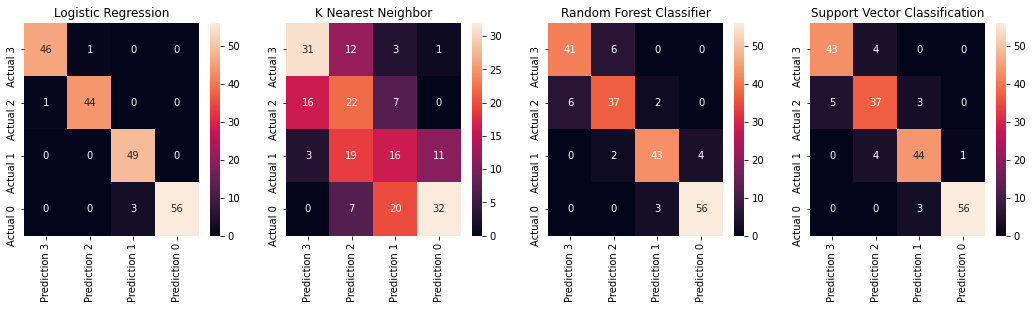

In [21]:
plt.figure(figsize=(18, 18))

plt.subplot(4,4,1)
sns.heatmap(dfLog, annot=True)
plt.title('Logistic Regression')

plt.subplot(4,4,2)
sns.heatmap(dfKNN, annot=True)
plt.title('K Nearest Neighbor')

plt.subplot(4,4,3)
sns.heatmap(dfRF, annot=True)
plt.title('Random Forest Classifier')

plt.subplot(4,4,4)
sns.heatmap(dfSVC, annot=True)
plt.title('Support Vector Classification')

plt.show()